In [1]:
import seaborn as sns
import umap.umap_ as umap


diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import RobustScaler


In [3]:
cat_cols = diamonds.sample(10).select_dtypes(include=["object","category"]).columns.tolist()
num_cols = diamonds.sample(10).select_dtypes(include=["number"]).columns.tolist()
print(cat_cols , num_cols)

['cut', 'color', 'clarity'] ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [4]:
%load_ext autoreload
%autoreload 2
from umap_vis import CombineUmap

In [5]:

combine_umap = CombineUmap(
    num_info={"method":"RobustScaler","cols":num_cols},
    cat_info = {"method":"OneHotEncoder","cols":cat_cols},
    target="")


In [6]:
combine_umap.fit(diamonds.sample(1000),
num_kwargs={"n_neighbors":15, "random_state":42,"n_jobs":20},
cat_kwargs={"metric":"dice", "n_neighbors" : 30, "random_state" : 42,"n_jobs":20})

/opt/conda/envs/test/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/conda/envs/test/lib/python3.8/site-packages/umap/umap_.py:1760: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

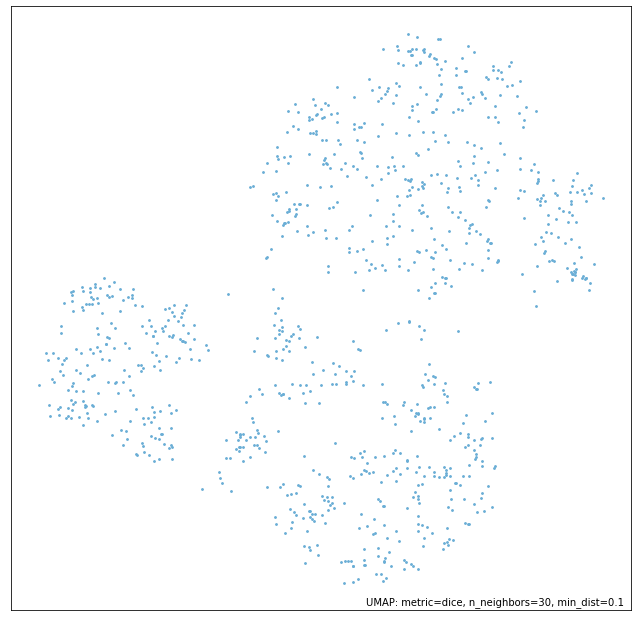

In [7]:
combine_umap.vis_points(combine_umap.cat_mapper,values=None)

In [9]:
num_emb , cat_emb = combine_umap.transform(diamonds.sample(1000))

/opt/conda/envs/test/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [10]:
combine_umap.vis_interactive(combine_umap.cat_mapper)

Loading BokehJS ...

<AxesSubplot:>

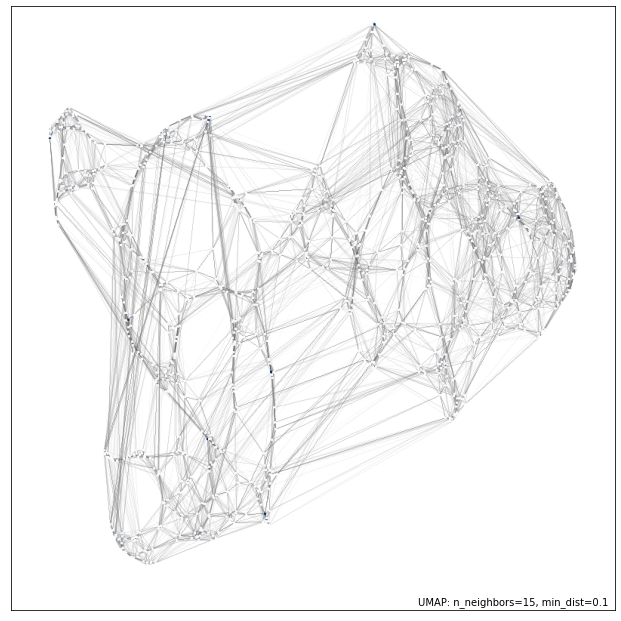

In [11]:
combine_umap.vis_connectivity(combine_umap.numeric_mapper)

In [12]:
combine_umap.make_new_mapper()

make new mapper 1.intersection_mapper 2.union_mapper 3.contrast_mapper


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

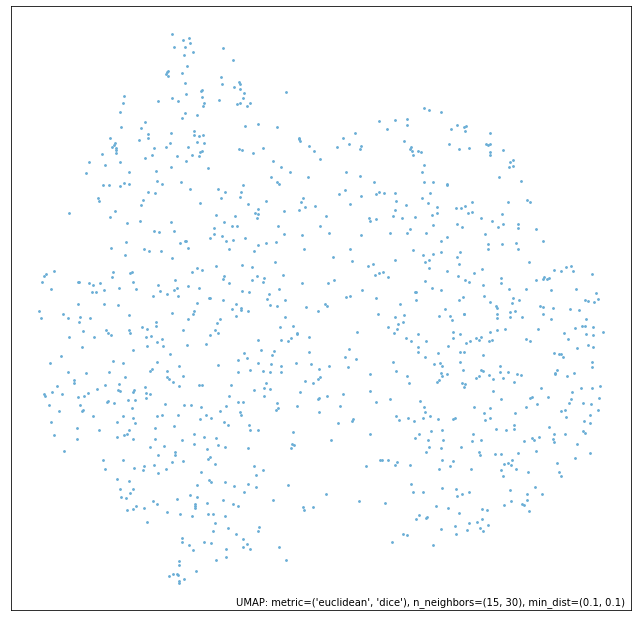

In [13]:
combine_umap.vis_points(combine_umap.intersection_mapper)

<AxesSubplot:>

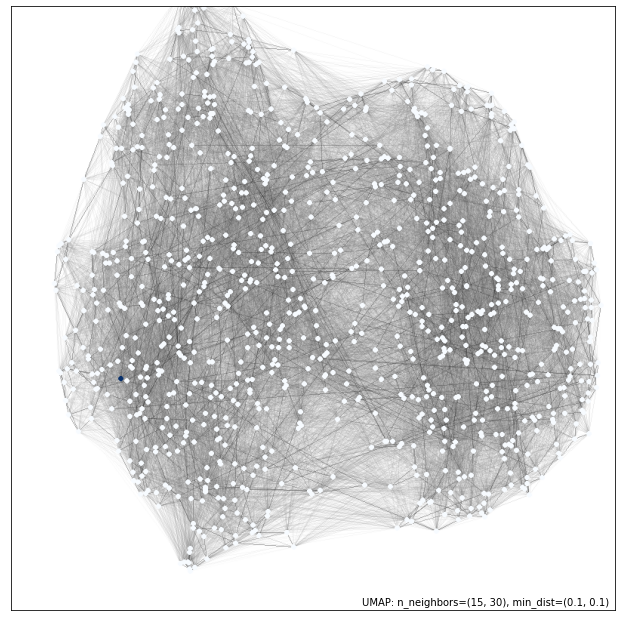

In [14]:
combine_umap.vis_connectivity(combine_umap.intersection_mapper)

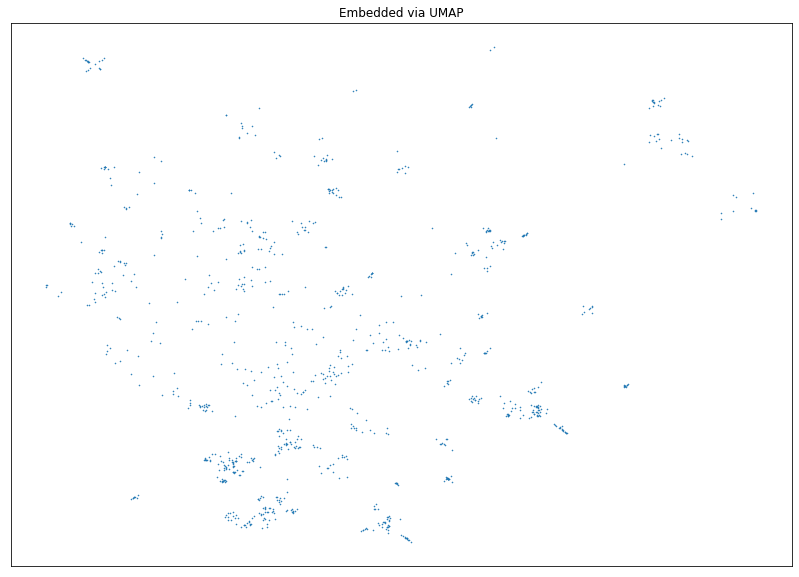

In [15]:
combine_umap.vis_basic(cat_emb)

In [21]:

from copy import deepcopy
df = deepcopy(diamonds)
num_encoder = RobustScaler()
df[num_cols]= num_encoder.fit_transform(df[num_cols])

# df = OrdinalEncoder(cols = cat_cols).fit_transform(df)
cat_encoder = OneHotEncoder(cols = cat_cols)
df = cat_encoder.fit_transform(df)

# numeric_mapper = umap.UMAP(n_neighbors=15, random_state=42).fit(scaled_numeric)
# ordinal_mapper = umap.UMAP(metric="manhattan", n_neighbors=150, random_state=42).fit(ordinal.values)

/opt/conda/envs/test/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [48]:
dir(cat_encoder)
#print(cat_encoder.use_cat_names)
# print(cat_encoder.category_mapping)
import re 

onehot_names = [feature_name for feature_name in cat_encoder.feature_names if any([ re.search( f"^{i}_", feature_name) for i in cat_encoder.cols])]
# [feature_name for feature_name in cat_encoder.feature_names if feature_name not in onehot_names]




# order encoder  = manhattan
# onehot encoder  = dice


In [ ]:
import umap.plot